**Import Dependencies**

In [12]:
import keras
from keras import layers
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt



**Defining the endcoder,decoder and autoenconder**

In [2]:
encoding_dim = 32  # 32 floats ->size of encoded representations, 

# This is our input 
input = keras.Input(shape=(784,))#assuming the input is 784 floats

# "encoded" 
encoded = layers.Dense(encoding_dim, activation='relu')(input)

# "decoded" 
decoded = layers.Dense(784, activation='sigmoid')(encoded)

In [3]:
autoencoder = keras.Model(input, decoded)

In [4]:
encoder = keras.Model(input, encoded)

In [5]:
# This is our encoded (32-dimensional) input
encoded_input = keras.Input(shape=(encoding_dim,))
# Retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
decoder = keras.Model(encoded_input, decoder_layer(encoded_input))

**Compile the autoencoder**

In [6]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

**Load the Dataset**

In [8]:
(x_train, _), (x_test, _) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


**Data Preprocessing**

In [9]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


**Fit the autoencoder model**

In [10]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
938/938 [==============================] - 4s 4ms/step - loss: 0.1910 - val_loss: 0.1327
Epoch 2/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1191 - val_loss: 0.1073
Epoch 3/10
938/938 [==============================] - 3s 3ms/step - loss: 0.1030 - val_loss: 0.0979
Epoch 4/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0971 - val_loss: 0.0943
Epoch 5/10
938/938 [==============================] - 3s 4ms/step - loss: 0.0953 - val_loss: 0.0934
Epoch 6/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0946 - val_loss: 0.0930
Epoch 7/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0942 - val_loss: 0.0928
Epoch 8/10
938/938 [==============================] - 4s 4ms/step - loss: 0.0940 - val_loss: 0.0926
Epoch 9/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0938 - val_loss: 0.0925
Epoch 10/10
938/938 [==============================] - 3s 3ms/step - loss: 0.0937 - val_loss: 0.0924

In [11]:
# Encode and decode some digits from test dataset
encoded_imgs = encoder.predict(x_test)
decoded_imgs = decoder.predict(encoded_imgs)

313/313 [==============================] - 0s 917us/step


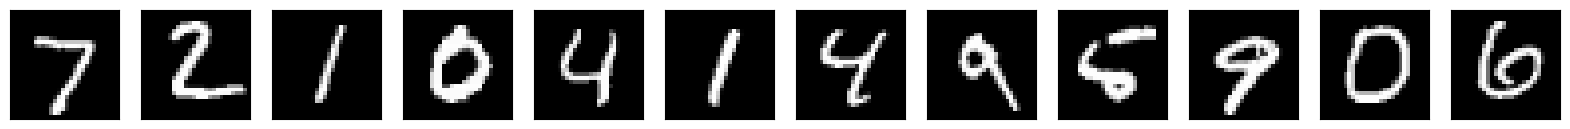

In [31]:
n = 12  # number of digits to show
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display original
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

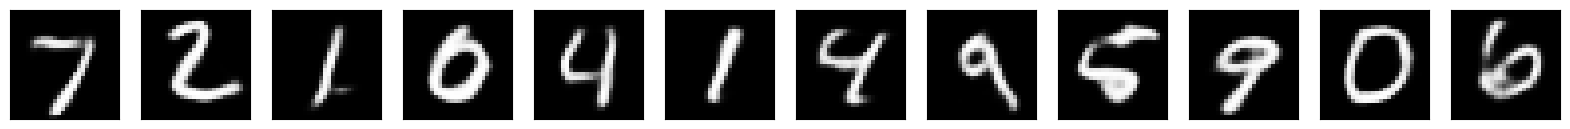

In [32]:
# Display reconstruction
n = 12  # How many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

**Autoencoder Application to image denoising**

*First generate noisy data*

In [22]:
#Generate noisy data
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))

noise_factor = 0.5
x_train_noisy = x_train + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_train.shape)#these are by default values of loc and sacale we can change them too 
x_test_noisy = x_test + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=x_test.shape) 

x_train_noisy = np.clip(x_train_noisy, 0., 1.)
x_test_noisy = np.clip(x_test_noisy, 0., 1.)

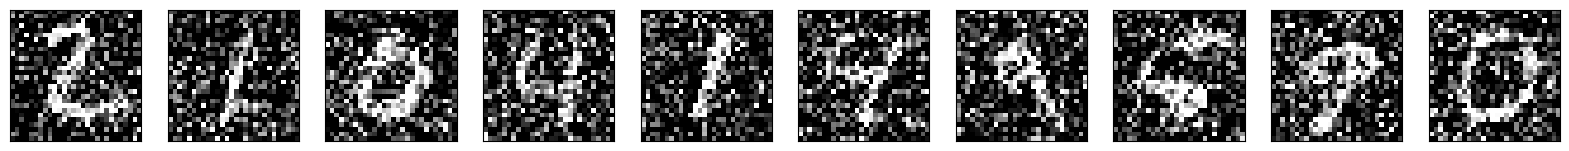

In [23]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(1, n + 1):
    ax = plt.subplot(1, n, i)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

**convolutional autoencoder:** 

*In order to improve the quality of the reconstructed images or data  with more filters per layer.*

In [26]:
input_img_data = keras.Input(shape=(28, 28, 1))

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(input_img_data)
x = layers.MaxPooling2D((2, 2), padding='same')(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
conv_encoded = layers.MaxPooling2D((2, 2), padding='same')(x)

# Upsampling

x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(conv_encoded)
x = layers.UpSampling2D((2, 2))(x)
x = layers.Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = layers.UpSampling2D((2, 2))(x)
conv_decoded = layers.Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

conv_autoencoder = keras.Model(input_img_data, conv_decoded)
conv_autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

**Fitting the convolutional autoencoder**

In [29]:
conv_autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                batch_size=64,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
938/938 [==============================] - 112s 119ms/step - loss: 0.1410 - val_loss: 0.1103
Epoch 2/10
938/938 [==============================] - 109s 117ms/step - loss: 0.1074 - val_loss: 0.1034
Epoch 3/10
938/938 [==============================] - 108s 116ms/step - loss: 0.1030 - val_loss: 0.1009
Epoch 4/10
938/938 [==============================] - 108s 116ms/step - loss: 0.1007 - val_loss: 0.0993
Epoch 5/10
938/938 [==============================] - 107s 114ms/step - loss: 0.0993 - val_loss: 0.0977
Epoch 6/10
938/938 [==============================] - 108s 115ms/step - loss: 0.0983 - val_loss: 0.0969
Epoch 7/10
938/938 [==============================] - 108s 115ms/step - loss: 0.0975 - val_loss: 0.0967
Epoch 8/10
938/938 [==============================] - 108s 115ms/step - loss: 0.0969 - val_loss: 0.0958
Epoch 9/10
938/938 [==============================] - 108s 115ms/step - loss: 0.0964 - val_loss: 0.0956
Epoch 10/10
938/938 [==============================] - 108s 115m

313/313 [==============================] - 4s 12ms/step


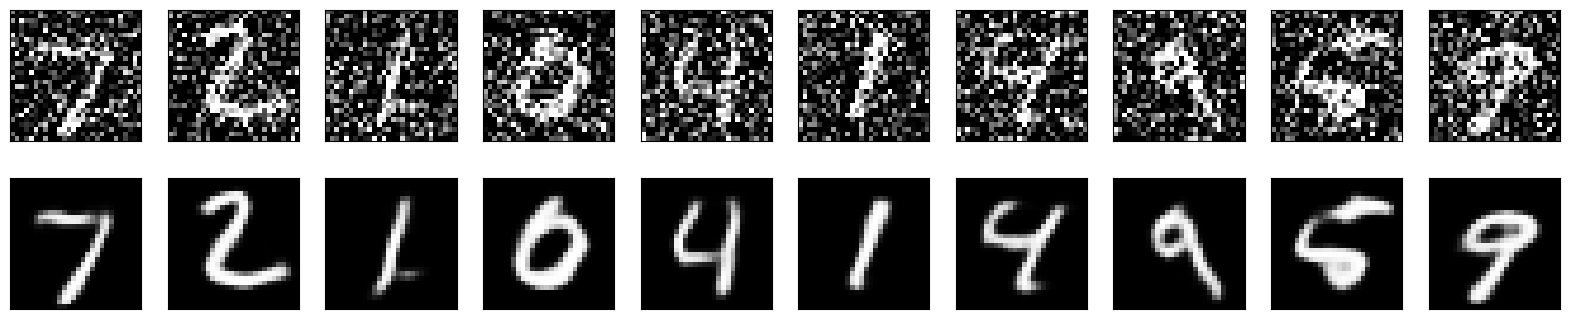

In [30]:
decoded_imgs = conv_autoencoder.predict(x_test_noisy)

# Plot the original noisy images and their denoised versions
n = 10 # Number of images to display
plt.figure(figsize=(20, 4))
for i in range(n):
    # Display the original noisy images
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test_noisy[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Display the denoised images
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

*Hence convolutional autoencoder has best use for denoising and anomlies reduction etc*